In [17]:
import json
import glob
import os
from typing import Dict, List
from itertools import chain
from collections import Counter

import numpy as np

import MeCab

mc = MeCab.Tagger('-Owakati')

In [4]:
def load_jsons(data_dir: str) -> List[Dict[str, str]]:
    """ load json files """
    json_paths = glob.glob(os.path.join(data_dir, "train*.json"))
    article_dicts = list()
    for json_path in json_paths:
        with open(json_path) as json_file:
            article_dicts.extend(json.load(json_file))
    
    return article_dicts

def tokenize(text: str) -> List[str]:
    return mc.parse(text).strip().split()

In [42]:
article_dicts = load_jsons("../data/")
len(article_dicts)

104050

In [9]:
details = [article_dict['body'].replace('\n', '') for article_dict in article_dicts]
summaries = ["。".join(article_dict['summary']) for article_dict in article_dicts]

In [12]:
source_tokens_list = list(map(lambda detail: tokenize(detail), details))
target_tokens_list = list(map(lambda summary: tokenize(summary), summaries))

In [37]:
source_token_lengh = list(map(lambda tokens: len(tokens), source_tokens_list))
target_token_lengh = list(map(lambda tokens: len(tokens), target_tokens_list))

In [40]:
np.percentile(source_token_lengh, 90)

1052.0

(array([8.4033e+04, 1.8036e+04, 1.5040e+03, 3.4700e+02, 7.8000e+01,
        2.4000e+01, 1.5000e+01, 3.0000e+00, 3.0000e+00, 3.0000e+00]),
 array([  35. ,  874.7, 1714.4, 2554.1, 3393.8, 4233.5, 5073.2, 5912.9,
        6752.6, 7592.3, 8432. ]),
 <BarContainer object of 10 artists>)

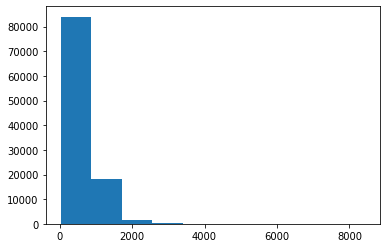

In [32]:
plt.hist(source_token_lengh)

In [41]:
for token_length in [source_token_lengh, target_token_lengh]:
    print(f'mean {np.mean(token_length):.1f}')
    print(f'max {np.max(token_length):.1f}')
    print(f'std {np.std(token_length):.1f}')
    print('-'*30)

mean 636.4
max 13594.0
std 399.9
------------------------------
mean 57.7
max 87.0
std 6.9
------------------------------
